### PCA 개요 

차원 축소 방법
1) feature selection
- 가지고 있는 여러 변수들 중 중요한 것을 고르기 (ex, 상관분석)

2) feature extraction
- 모든 변수을 조합하여 전체 데이터를 잘 표현할 수 있는 주요 성분을 가진 새로운 변수 추출 (ex, 주성분 분석)

주성분 분석

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유 벡터와 고유 값 계산
3. 고유값이 가장 큰 순으로 k개 만큼 고유 벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용하여 새롭게 입력 데이터 변환

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환

##차원 축소나 clustering은 label이 쓰이지 않는다.--> 비지도 학습의 정의!
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

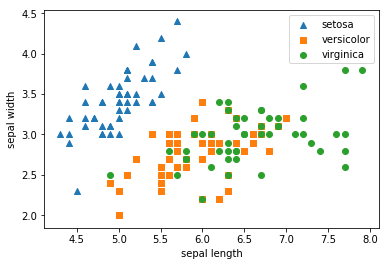

In [7]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o'] 

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 

##enumerate는 (i, markers) 이렇게 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환한다.
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

    ##2차원의 그래프를 보고 싶은 것이니깐 그래프로 아래와 같이 확인을 해보는 것이다. 
    ##보면 파란색은 잘 구별이 되어 있는데 나머지는 섞여 있다. 
plt.legend()
##그래프를 한번에 여러개를 그릴 때, 각 그래프마다 라벨을 달고 그 라벨명을 출력할 수 있게 한다.
##그래프 오른쪽 위의 라벨들이 그 예시이다.
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [6]:
from sklearn.decomposition import PCA

##각각 분산을 나타내주는 건데 cumsum은 누적합을 나타내주는 것이다.
##두개정도만 있어도 충분히 변동성을 볼 수 있겠다. 라는 것을 알 수 있다.
##2개가 넘었을 때 이미 90%가 넘는 설명력을 가진다. 고유벡터를 몇개를 뽑아내는지에 대해 알고 싶어서 저렇게 쓰는 것이다. 

pca = PCA().fit(iris_scaled)
np.cumsum(pca.explained_variance_ratio_)

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [7]:
##그래서 2로 설정을 할 수가 있는 것이다. 

pca = PCA(n_components=2) ##차원을 2차원으로 PCA는 주성분 분석

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

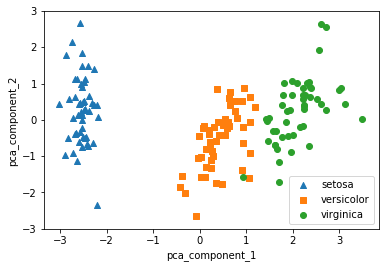

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

##아까와 다르게 따로 따로 구분이 되어 있다. PCA component = 2가 변동성을 잘 구분해주기 때문이라고 해석할 수 있다. 

In [10]:
print(pca.explained_variance_ratio_) 

##cumsum 이 아니기 때문에 각각의 lambda값을 나타내는 것이다. 

[0.76740358 0.18282727]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)

##마지막 97은 예측 정확도로서 cv 3번을 돌려서 나온 정확도이다. 
##PCA를 돌린 두번째 것이 원래 데이터의 예측도와 유사하다. 즉 데이터 손실이 그렇게 많지 않다. 

[0.98039216 0.94117647 0.97916667]


In [16]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

##clustering을 하기 전에 변수들을 넣게 될 텐데 변수가 너무 많으면 안되기 때문에 
## 변수를 줄이고 싶은 것이다. 

[0.98039216 0.96078431 1.        ]
